# Data Exploration

The purpose of the notebook is to comprehensively show different aspects of the given dataset, about fraudulent transactions.

**Imports:**

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.plotting.register_matplotlib_converters()

## Data overview

As we can see in the following snippet of code, we have a total of **26975** transactions, each one with **15** different features/columns

In [105]:
fraud_data_path = "../data/ds_challenge_2021.csv"
fraud_df = pd.read_csv(fraud_data_path)

print(fraud_df.head(10))
print(fraud_df.columns)

   ID_USER genero       monto       fecha  hora  \
0        0      F  608.345634  2020-01-21    20   
1        0      F   88.719243  2020-01-15     7   
2        1      F  790.037653  2020-01-17    11   
3        1      F  767.005387  2020-01-05    11   
4        1      F  254.171053  2020-01-30    10   
5        1      F   37.003747  2020-01-27     3   
6        1      F  334.516017  2020-01-06     2   
7        1      F  322.264405  2020-01-11    13   
8        1      F  911.797804  2020-01-19     3   
9        2      F  160.095187  2020-01-08     2   

                                         dispositivo establecimiento  \
0  {'model': 2020, 'device_score': 3, 'os': 'ANDR...           Super   
1  {'model': 2020, 'device_score': 1, 'os': 'ANDR...             NaN   
2      {'model': 2020, 'device_score': 1, 'os': '.'}             NaN   
3    {'model': 2020, 'device_score': 3, 'os': 'WEB'}           MPago   
4     {'model': 2020, 'device_score': 3, 'os': '%%'}             NaN   
5     

We can also see that there are only continous features are: "linea_tc", "interes_tc", "dcto", "monto" and "cashback"; the rest are discrete/categorical. There is a total of **21797** missing values in the dataset: **10119** from "establecimiento" and **11678** from "ciudad":

In [106]:
print("Data types:")
print(fraud_df.dtypes)
print("Missing values:")
print(fraud_df.isna().sum())

Data types:
ID_USER              int64
genero              object
monto              float64
fecha               object
hora                 int64
dispositivo         object
establecimiento     object
ciudad              object
tipo_tc             object
linea_tc             int64
interes_tc           int64
status_txn          object
is_prime              bool
dcto               float64
cashback           float64
fraude                bool
dtype: object
Missing values:
ID_USER                0
genero                 0
monto                  0
fecha                  0
hora                   0
dispositivo            0
establecimiento    10119
ciudad             11678
tipo_tc                0
linea_tc               0
interes_tc             0
status_txn             0
is_prime               0
dcto                   0
cashback               0
fraude                 0
dtype: int64


From all the examples that were given, only **810** are fraudulent transactions; meaining that the target feature is unbalanced since the negative examples are underrepresented:

In [107]:
print(fraud_df.fraude.value_counts())

False    26165
True       810
Name: fraude, dtype: int64


## Distribution of features:

In this subsection we will see the structure of the data in some of the important columns and how they relate to the target variable ("fraude").
First we are going to see the distribution of fraudulent transactions inside the discrete variables

## Gender

genero    --      F      M
fraude                    
False   2642  10392  13131
True      88    334    388


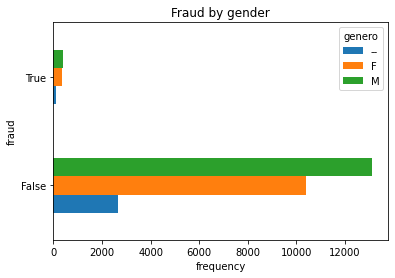

In [108]:
fraud_by_gender = fraud_df.groupby("fraude").genero.value_counts().unstack("genero")

print(fraud_by_gender)

fraud_by_gender.plot.barh()
plt.title("Fraud by gender")
plt.xlabel("frequency")
plt.ylabel("fraud")
plt.show()

As we can see, for both fraudulent and not fraudulent transactions, the male population is the biggest, followed by the female population and finally by the "--" (not defined) population. Within the population
that commited fraud, the male population is bigger than the female one by 54, and the "--" is the least represented population. We can't determine if one gender category is more likely to commit fraud because, among other reasons, we have an uneven representation of the population (males are overrepresented).

## Establishment and City

The establishment and city of each transaction contain all of the missing values in the dataset which, as we observe in the following graphics, are the most predominant values of each feature. In order to show the missing values in the barplots, we filled the NaN with an "UNK" placeholder, indicating that the value is unknown.

For these two columns, we can also see that the fraudulent transactions are more or less evenly distributed for each city and establishment (if we don't take into account the "UNK" values). 

fraude       False  True 
ciudad                   
Guadalajara   3715    118
Merida        3641    120
Monterrey     3606    100
Toluca        3879    118
UNK          11324    354


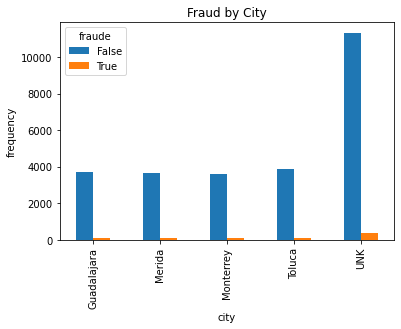

fraude           False  True 
establecimiento              
Abarrotes         3313    102
Farmacia          3150     92
MPago             3239    104
Restaurante       3361     93
Super             3300    102
UNK               9802    317


In [109]:
# Fill all NaN values with the "UNK" placeholder (all NaN values are within the city and establishment columns)
fraud_df = fraud_df.fillna("UNK")

fraud_by_city = fraud_df.groupby("ciudad").fraude.value_counts().unstack("fraude")
print(fraud_by_city)
fraud_by_city.plot.bar()
plt.title("Fraud by City")
plt.xlabel("city")
plt.ylabel("frequency")
plt.show()

fraud_by_establishment = fraud_df.groupby("establecimiento").fraude.value_counts().unstack("fraude")
print(fraud_by_establishment)
fraud_by_establishment.plot.bar()
plt.title("Fraud by Establishment")
plt.xlabel("establishment")
plt.ylabel("frequency")
plt.show()

#print(fraud_df.groupby("establecimiento").fraude.value_counts())
# fraud_df.groupby("establecimiento").fraude.value_counts().unstack("fraude").plot.bar()
# plt.show()

## Time Data

We see that frauds are more or less distributed uniformly across dates and hours: frauds across days are between 20 and 30, and 

fraude      False  True 
fecha                   
2020-01-02    912     28
2020-01-03    882     31
2020-01-04    875     24
2020-01-05    920     30
2020-01-06    904     29
2020-01-07    939     22
2020-01-08    892     27
2020-01-09    884     28
2020-01-10    851     18
2020-01-11    909     26
2020-01-12    938     31
2020-01-13    906     29
2020-01-14    860     24
2020-01-15    919     33
2020-01-16    880     36
2020-01-17    913     28
2020-01-18    908     28
2020-01-19    909     26
2020-01-20    892     35
2020-01-21    890     30
2020-01-22    896     32
2020-01-23    863     28
2020-01-24    941     25
2020-01-25    923     23
2020-01-26    898     28
2020-01-27    907     20
2020-01-28    880     34
2020-01-29    945     32
2020-01-30    929     25


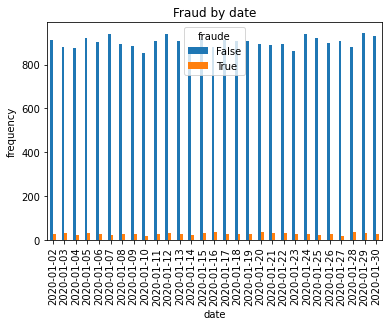

fraude  False  True 
hora                
1        1158     32
2        1131     31
3        1133     30
4        1144     32
5        1178     27
6        1172     30
7        1179     48
8        1113     33
9        1074     35
10       1165     37
11       1126     36
12       1109     28
13       1084     27
14       1129     41
15       1166     41
16       1154     33
17       1114     36
18       1171     37
19       1160     44
20       1084     34
21       1171     28
22       1166     45
23       1084     45


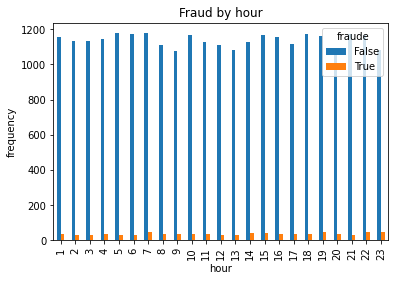

In [110]:
fraud_by_date = fraud_df.groupby("fecha").fraude.value_counts().unstack()
print(fraud_by_date)
fraud_by_date.plot.bar()
plt.title("Fraud by date")
plt.xlabel("date")
plt.ylabel("frequency")
plt.show()

fraud_by_hour = fraud_df.groupby("hora").fraude.value_counts().unstack()
print(fraud_by_hour)
fraud_by_hour.plot.bar()
plt.title("Fraud by hour")
plt.xlabel("hour")
plt.ylabel("frequency")
plt.show()


We could inspect for this data, the frequency of frauds given an specific date and hours by joining the two columns like it's shown below

In [111]:
fraud_by_time = fraud_df.groupby(["fecha", "hora"]).fraude.value_counts()
print(fraud_by_time)

fecha       hora  fraude
2020-01-02  1     False     48
                  True       1
            2     False     36
            3     False     35
            4     False     33
                            ..
2020-01-30  21    False     30
                  True       2
            22    False     40
                  True       2
            23    False     37
Name: fraude, Length: 1137, dtype: int64


## Credit Card Data

The columns that describe the credit card are: "tipo_tc", "linea_tc", "interes_tc" and "is_prime". The following plots summarize the information contained on each column.

For columns such as "linea_tc" we group the data by number ranges and compute the mean to show them as bar plots to see the distribution.

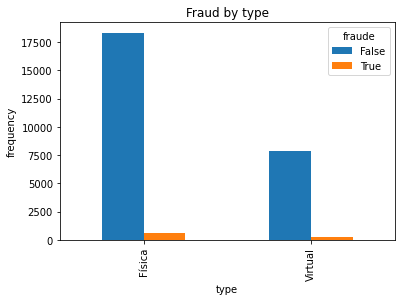

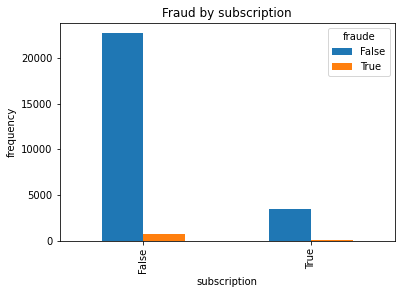

count    26975.000000
mean     62476.811863
std      21886.892902
min      25000.000000
25%      44000.000000
50%      62000.000000
75%      82000.000000
max      99000.000000
Name: linea_tc, dtype: float64
linea_tc
(25000, 30000]    27953.061224
(30000, 35000]    33019.765287
(35000, 40000]    38057.174272
(40000, 45000]    43233.169130
(45000, 50000]    47982.646421
(50000, 55000]    52980.479643
(55000, 60000]    58160.073037
(60000, 65000]    62953.432836
(65000, 70000]    68098.288239
(70000, 75000]    73143.389199
(75000, 80000]    77847.624249
(80000, 85000]    83003.237992
(85000, 90000]    87829.787234
(90000, 95000]    92892.172110
Name: linea_tc, dtype: float64


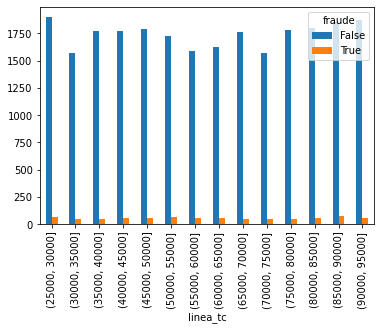

count    26975.000000
mean        48.224875
std          9.587256
min         32.000000
25%         40.000000
50%         48.000000
75%         57.000000
max         64.000000
Name: interes_tc, dtype: float64
interes_tc
(32, 37]    34.893053
(37, 42]    40.034203
(42, 47]    45.014744
(47, 52]    50.024733
(52, 57]    55.056764
(57, 62]    59.842201
Name: interes_tc, dtype: float64


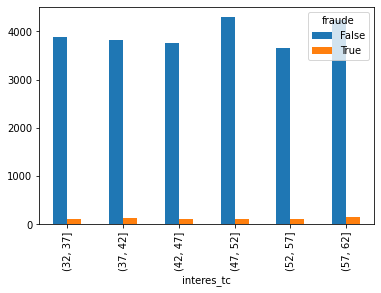

In [112]:
fraud_by_type = fraud_df.groupby("tipo_tc").fraude.value_counts().unstack()
fraud_by_type.plot.bar()
plt.title("Fraud by type")
plt.xlabel("type")
plt.ylabel("frequency")
plt.show()

fraud_by_prime = fraud_df.groupby("is_prime").fraude.value_counts().unstack()
fraud_by_prime.plot.bar()
plt.title("Fraud by subscription")
plt.xlabel("subscription")
plt.ylabel("frequency")
plt.show()


print(fraud_df.linea_tc.describe())
# group the column into appropiate ranges 
amount_ranges = pd.cut(fraud_df.linea_tc, np.arange(25000, 99000, 5000))
print(fraud_df.groupby(amount_ranges).linea_tc.mean())
fraud_df.groupby(amount_ranges).fraude.value_counts().unstack("fraude").plot.bar()
plt.show()

print(fraud_df.interes_tc.describe())
amount_ranges = pd.cut(fraud_df.interes_tc, np.arange(32, 64, 5))
print(fraud_df.groupby(amount_ranges).interes_tc.mean())
fraud_df.groupby(amount_ranges).fraude.value_counts().unstack("fraude").plot.bar()
plt.show()

## Transaction Data

Here we plot the data related to the transaction type "status_txn" and the amount of the transtacion "monto". As in the previous cells, we will group the amount of the transaction into ranges to visualize the column better.



In [113]:
fraud_by_status = fraud_df.groupby("status_txn").fraude.value_counts().unstack()
print(fraud_by_status)
fraud_by_status.plot.bar()
plt.title("Fraud by subscription")
plt.xlabel("transaction status")
plt.ylabel("frequency")
plt.show()

plt.boxplot(fraud_df.monto)
plt.title("Transaction amount: Box plot")
plt.show()

print(fraud_df.monto.describe())
amount_ranges = pd.cut(fraud_df.monto, np.arange(0.0, 1000.0, 100.0))
print(fraud_df.groupby(amount_ranges).monto.mean())
fraud_df.groupby(amount_ranges).fraude.value_counts().unstack("fraude").plot.bar()
plt.show()

fraude      False  True 
status_txn              
Aceptada    18274    570
En proceso   5179    162
Rechazada    2712     78


count    26975.000000
mean       499.069493
std        289.309518
min          0.017303
25%        246.521227
50%        500.501022
75%        749.598192
max        999.917764
Name: monto, dtype: float64

## 